In [2]:

import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

	
# Read the image 
img = cv2.imread('images/xray.jpeg') 

# converting to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the images
plt.imshow(img, cmap = 'gray') 
plt.show()

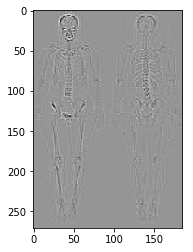

In [3]:
#laplacian of main image 
laplacian = cv2.Laplacian(gray,cv2.CV_64F)

# Display the images
plt.imshow(laplacian, cmap = 'gray') 
plt.show()

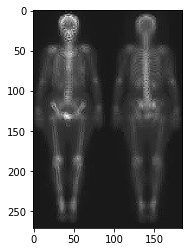

In [4]:
#image sharpening by adding original image and laplacian image 
sharpened_img = gray + laplacian 

# Display the images
plt.imshow(sharpened_img, cmap = 'gray') 
plt.show()

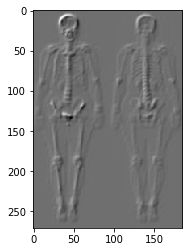

In [5]:
#sobel gradient of original image 

sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)  # y

sobel_img = sobelx + sobely 

# Display the images
plt.imshow(sobel_img, cmap = 'gray') 
plt.show()

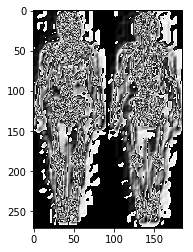

In [6]:
#sobel image smoothed with a 5X5 averaging filter 


# Obtain number of rows and columns 
# of the image 
m, n = sobel_img.shape 

# Develop Averaging filter(5, 5) mask 
mask = np.ones([5, 5], dtype = int) 
mask = mask / 25

# Convolve the 5X5 mask over the image 
smoothed_sobel = np.zeros([m, n]) 

for i in range(1, m-1): 
	for j in range(1, n-1): 
		temp = sobel_img[i-1, j-1]*mask[0, 0]+sobel_img[i-1, j]*mask[0, 1]+sobel_img[i-1, j + 1]*mask[0, 2]+sobel_img[i, j-1]*mask[1, 0]+ sobel_img[i, j]*mask[1, 1]+sobel_img[i, j + 1]*mask[1, 2]+sobel_img[i + 1, j-1]*mask[2, 0]+sobel_img[i + 1, j]*mask[2, 1]+sobel_img[i + 1, j + 1]*mask[2, 2] 
		
		smoothed_sobel[i, j]= temp 
		
smoothed_sobel = smoothed_sobel.astype(np.uint8) 


# Display the images
plt.imshow(smoothed_sobel, cmap = 'gray') 
plt.show()

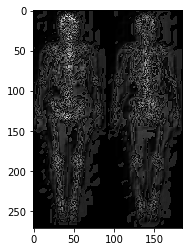

In [7]:
#multiplying sharpened laplacian and smoothed sobel gradient 

mask = sharpened_img * smoothed_sobel

# Display the images
plt.imshow(mask, cmap = 'gray') 
plt.show()


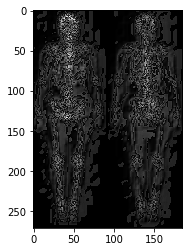

In [8]:
# more sharpened image by summing original image and mask 

sharpened_img2 = gray + mask 

# Display the images
plt.imshow(sharpened_img2, cmap = 'gray') 
plt.show()


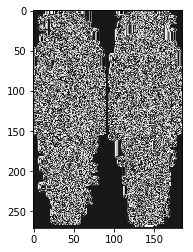

In [9]:
#applying power law for enhancement 
gamma = 1.1

# Apply gamma correction. 
gamma_corrected = np.array(255*(sharpened_img2 / 255) ** gamma, dtype = 'uint8') 

plt.imshow(gamma_corrected, cmap='gray') 
plt.show() 
